In [63]:
import numpy as np
from PIL import Image
import torch
from torchvision import models, transforms
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import os

%matplotlib inline

# Test

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
img_id = 5

img_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.jpg'.format(img_id)
bb_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.txt'.format(img_id)

In [73]:
img, bbs = load_image_and_bbs(img_path, bb_path) 

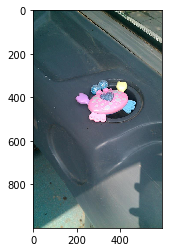

In [74]:
plt.figure()
plt.imshow(img)

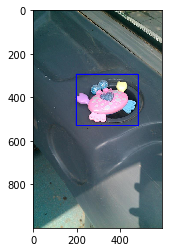

In [75]:
show_img_with_bbs(img, bbs)

In [30]:
from cnn_cbir import SearchEngine, FeatureExtractor

In [31]:
test_dir = '../SIFT-BOW-CBIR/Images'

In [32]:
feature_extrator = FeatureExtractor()

In [33]:
engine = SearchEngine(test_dir, feature_extrator)

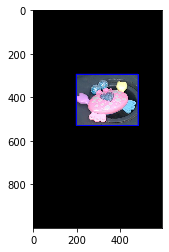

In [51]:
masked, patches = engine._get_masked_img(img, bbs)
show_img_with_bbs(masked, bbs)

In [49]:
engine.build()

2020-03-21 12:57:18,683 - INFO - Write database feature matrix into memory...
2020-03-21 12:57:18,683 - INFO - computing database feature matrix...
2020-03-21 12:57:18,684 - INFO - computing feature for ../SIFT-BOW-CBIR/Images/00698.jpg...
2020-03-21 12:57:25,337 - DEBUG - fea_size(): torch.Size([1, 22, 512])
2020-03-21 12:57:25,337 - DEBUG - regions_ijww.shape: (22, 4)
2020-03-21 12:57:25,339 - DEBUG - reg_feat_mat.size(): torch.Size([22, 512])
2020-03-21 12:57:25,339 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 12:57:25,340 - INFO - computing feature for ../SIFT-BOW-CBIR/Images/01078.jpg...
2020-03-21 12:57:31,851 - DEBUG - fea_size(): torch.Size([1, 22, 512])
2020-03-21 12:57:31,851 - DEBUG - regions_ijww.shape: (22, 4)
2020-03-21 12:57:31,851 - DEBUG - reg_feat_mat.size(): torch.Size([22, 512])
2020-03-21 12:57:31,852 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 12:57:31,853 - INFO - computing feature for ../SIFT-BOW-CBIR/Images/01280.jpg...
2020-03-21 1

In [58]:
engine = SearchEngine(test_dir, feature_extrator)
engine.build()

2020-03-21 13:10:32,377 - INFO - Write database feature matrix into memory...
2020-03-21 13:10:32,377 - INFO - cached database feature matrix found in feature_cache/db_fea_mat.pth, loading it directly.


In [68]:
img = cv2.imread(engine.im_paths[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
similar_imgs = engine.retrieve_img(img, top_k=5)

2020-03-21 13:23:49,707 - DEBUG - fea_size(): torch.Size([1, 22, 512])
2020-03-21 13:23:49,708 - DEBUG - regions_ijww.shape: (22, 4)
2020-03-21 13:23:49,708 - DEBUG - reg_feat_mat.size(): torch.Size([22, 512])
2020-03-21 13:23:49,709 - DEBUG - ag_feat_vec.size(): torch.Size([512])


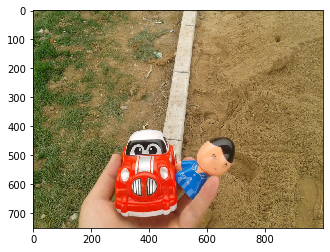

In [70]:
plt.figure()
plt.imshow(img)

tensor(1.0000)
tensor(0.8507)
tensor(0.8504)
tensor(0.8362)
tensor(0.8262)


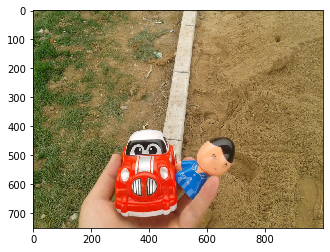

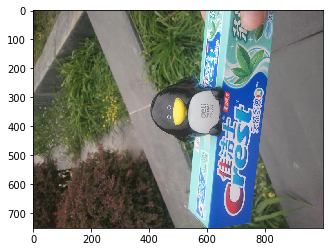

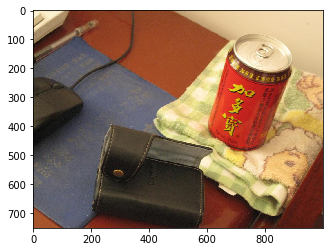

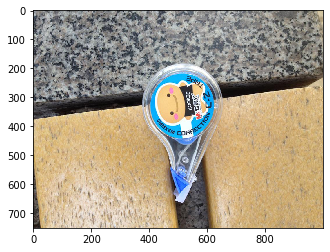

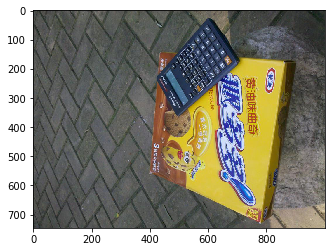

In [71]:
for im_path, score in similar_imgs:
    print(score)
    im = cv2.imread(im_path)[:, :, ::-1]
    plt.figure()
    plt.imshow(im)

In [86]:
img_id = 5
img_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.jpg'.format(img_id)
bb_path = '/home/zhulei/Data/pg_data/Queries/{:02d}.txt'.format(img_id)
img, bbs = load_image_and_bbs(img_path, bb_path) 

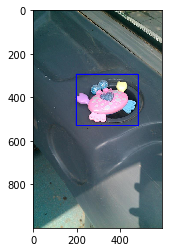

In [87]:
show_img_with_bbs(img, bbs)

In [88]:
similar_imgs = engine.retrieve_object(img, bbs, top_k=5)

2020-03-21 13:59:40,283 - DEBUG - fea_size(): torch.Size([1, 28, 512])
2020-03-21 13:59:40,283 - DEBUG - regions_ijww.shape: (28, 4)
2020-03-21 13:59:40,284 - DEBUG - reg_feat_mat.size(): torch.Size([28, 512])
2020-03-21 13:59:40,284 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 13:59:40,285 - INFO - computing bounding box for retrieved 5 images...
  0%|          | 0/5 [00:00<?, ?it/s]2020-03-21 13:59:40,285 - INFO - computing bounding boxes in ../SIFT-BOW-CBIR/Images/01078.jpg
2020-03-21 13:59:40,286 - INFO - cached feature for ../SIFT-BOW-CBIR/Images/01078.jpg is found, directly loading it.
2020-03-21 13:59:40,839 - DEBUG - feat_im.size(): torch.Size([22, 512])
2020-03-21 13:59:40,840 - DEBUG - feat_patch.size(): torch.Size([512])
2020-03-21 13:59:40,840 - DEBUG - similarity.size(): torch.Size([22])
 20%|██        | 1/5 [00:00<00:02,  1.80it/s]2020-03-21 13:59:40,841 - INFO - computing bounding boxes in ../SIFT-BOW-CBIR/Images/04023.jpg
2020-03-21 13:59:40,841 - INFO - c

0.7326411008834839
0.7116953134536743
0.697283148765564
0.6962628364562988
0.6862748265266418


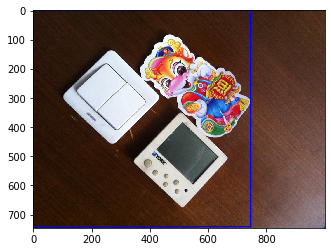

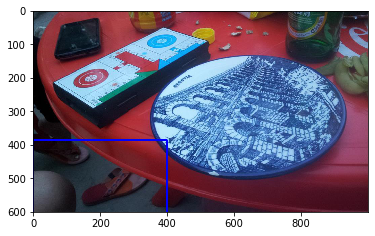

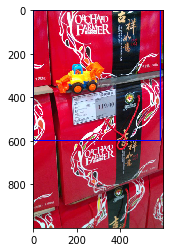

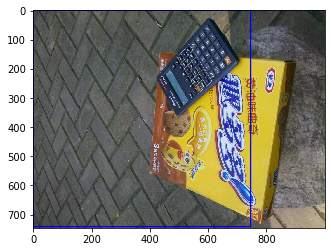

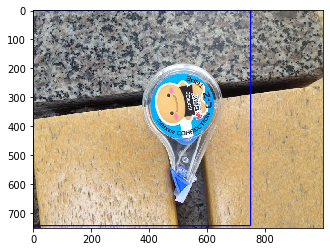

In [84]:
for im_path, score, bbs in similar_imgs:
    print(score)
    im = cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2RGB)
    show_img_with_bbs(im, bbs)

# large scale test

In [2]:
from cnn_cbir import SearchEngine, FeatureExtractor

data_dir = '/home/zhulei/Data/pg_data/Images'
fea_extractor = FeatureExtractor(cache_dir='largedata_cache')
search_engine = SearchEngine(data_dir, fea_extractor)

In [ ]:
search_engine.build()

2020-03-21 14:16:29,595 - INFO - Write database feature matrix into memory...
2020-03-21 14:16:29,597 - INFO - computing database feature matrix...
2020-03-21 14:16:29,598 - INFO - computing feature for /home/zhulei/Data/pg_data/Images/00001.jpg...
2020-03-21 14:16:36,205 - DEBUG - fea_size(): torch.Size([1, 22, 512])
2020-03-21 14:16:36,206 - DEBUG - regions_ijww.shape: (22, 4)
2020-03-21 14:16:36,206 - DEBUG - reg_feat_mat.size(): torch.Size([22, 512])
2020-03-21 14:16:36,207 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 14:16:36,207 - INFO - computing feature for /home/zhulei/Data/pg_data/Images/00002.jpg...
2020-03-21 14:16:41,968 - DEBUG - fea_size(): torch.Size([1, 25, 512])
2020-03-21 14:16:41,968 - DEBUG - regions_ijww.shape: (25, 4)
2020-03-21 14:16:41,968 - DEBUG - reg_feat_mat.size(): torch.Size([25, 512])
2020-03-21 14:16:41,969 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 14:16:41,970 - INFO - computing feature for /home/zhulei/Data/pg_data/Image

2020-03-21 14:18:29,866 - INFO - computing feature for /home/zhulei/Data/pg_data/Images/00022.jpg...
2020-03-21 14:18:36,357 - DEBUG - fea_size(): torch.Size([1, 22, 512])
2020-03-21 14:18:36,358 - DEBUG - regions_ijww.shape: (22, 4)
2020-03-21 14:18:36,358 - DEBUG - reg_feat_mat.size(): torch.Size([22, 512])
2020-03-21 14:18:36,359 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 14:18:36,359 - INFO - computing feature for /home/zhulei/Data/pg_data/Images/00023.jpg...
2020-03-21 14:18:42,988 - DEBUG - fea_size(): torch.Size([1, 22, 512])
2020-03-21 14:18:42,988 - DEBUG - regions_ijww.shape: (22, 4)
2020-03-21 14:18:42,988 - DEBUG - reg_feat_mat.size(): torch.Size([22, 512])
2020-03-21 14:18:42,989 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 14:18:42,989 - INFO - computing feature for /home/zhulei/Data/pg_data/Images/00024.jpg...
2020-03-21 14:18:49,398 - DEBUG - fea_size(): torch.Size([1, 22, 512])
2020-03-21 14:18:49,398 - DEBUG - regions_ijww.shape: (22, 4)


2020-03-21 14:20:28,623 - DEBUG - regions_ijww.shape: (22, 4)
2020-03-21 14:20:28,623 - DEBUG - reg_feat_mat.size(): torch.Size([22, 512])
2020-03-21 14:20:28,624 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 14:20:28,625 - INFO - computing feature for /home/zhulei/Data/pg_data/Images/00044.jpg...
2020-03-21 14:20:35,209 - DEBUG - fea_size(): torch.Size([1, 22, 512])
2020-03-21 14:20:35,209 - DEBUG - regions_ijww.shape: (22, 4)
2020-03-21 14:20:35,210 - DEBUG - reg_feat_mat.size(): torch.Size([22, 512])
2020-03-21 14:20:35,210 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 14:20:35,211 - INFO - computing feature for /home/zhulei/Data/pg_data/Images/00045.jpg...
2020-03-21 14:20:40,466 - DEBUG - fea_size(): torch.Size([1, 28, 512])
2020-03-21 14:20:40,467 - DEBUG - regions_ijww.shape: (28, 4)
2020-03-21 14:20:40,467 - DEBUG - reg_feat_mat.size(): torch.Size([28, 512])
2020-03-21 14:20:40,468 - DEBUG - ag_feat_vec.size(): torch.Size([512])
2020-03-21 14:20:40,468